# **<center> **SPAM EMAIL DETECTION** </CENTER>**

# **<center> **![python logo](https://blogcdn.gmass.co/blog/wp-content/uploads/2021/01/spamfolder-feat-redo-tinified.png)** </center>**

# **<center> **TABLE OF CONTENT 🧐** </CENTER>**
- [1. DIABETES PREDICTION](#section-1-DIABETES-PREDICTION)
     - [1.1. Introduction](#subsection-1.1-Introduction)
     - [1.2. Dataset Info](#subsection-1.2-Dataset-Info)
     - [1.3. About Dataset](#subsection-1.3-About-Dataset)
     - [1.4. Importing Libraries](#subsection-1.4-Importing-Libraries:)
     - [1.5. Load the dataset](#subsection-1.5-Load-the-dataset)
- [2. ANALYSIS REPORT](#section-2-Analysis-Report)
- [3. EXPLORING THE DATASET](#section-3-EXPLORING-THE-DATASET)
     - [3.1. Viewing the dataset](#subsection-3.1-Viewing-the-dataset)
     - [3.2. Statistical Summary](#subsection-3.2-Statistical-Summary)
     - [3.3. Unique Values](#subsection-3.3-Unique-Values)
     - [3.4. Duplicate Values](#subsection-3.4-Duplicate-Values)
     - [3.5. Missing Values](#subsection-3.5-Missing-Values)   
     - [3.6. Correlation](#subsection-3.6-Correlation)     
- [4. DATA VISUALIZATION](#section-4-DATA-VISUALIZATION)
- [5. WORD CLOUD](#section-4-WORD-CLOUD)
- [6. FEATURE ENGINEERING](#section-5-FEATURE-ENGINEERING)
     - [6.1. One Hot Encoding through Pandas function](#subsection-5.1-One-Hot-Encoding-through-Pandas-function)
     - [6.2. Label Encoding](#subsectio-5.2-Label-Encoding)        
     - [6.3. Standard Scaling](#subsection-5.3-Standard-Scaling)
     - [6.4. Effect of Scaling](#subsection-5.4-Effect-of-Scaling)
     - [6.5. Distribution of Scaling](#subsection-5.5-Distribution-of-Scaling)                        
- [7. Model Evaluation](#section-6-Model-Evaluation)
     - [7.1. Random Forest Classifier](#subsectio-6.1-Label-Encoding)
     - [7.2. K-Nearest Neighbor](#subsectio-6.2-K-Nearest-Neighbor)
     - [7.3. AdaBoosting Classifier](#subsectio-6.3-AdaBoosting-Classifier)
     - [7.5. Logistic Regression](#subsectio-6.5-Logistic-Regression) 
- [8. WEBPAGE](#section-7-WEBPAGE) 
- [9. CONCLUSION](#section-8-CONCLUSION)                                  

# 1.1. Introduction&#x1F4A1;:

1. Import the necessary libraries.
2. Load the dataset.
3. Read the dataset and analyze what kind of information is given in the data.
4. Perform EDA and visualize the data by plotting the graphs such as barplots, piechart etc.
5. Perform feature engineering and extract the meaningful information and insights in the given dataset.
6. Split the data into training and testing (training: 80%, testing: 20%).
7. Use different evaluation techniques like Random Forest Classifier, AdaBoost Classifier etc for model evaluation and predict the accuracy of the model through accuracy score.
8. Make the analysis report of the dataset.
9. Make the Web Page.

# 1.2. Dataset Info &#x1F4C8;:

I take this dataset from the kaggle website: https://www.kaggle.com/datasets/mfaisalqureshi/spam-email

# 1.3. About Dataset &#x1F4C4;:

1. Category: represents whether the email is spam or ham.

2. Message: represents text.

# 1.4. Importing Libraries :books::

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
import pickle

# 1.5. Load the dataset &#x231B;:

In [2]:
emails=pd.read_csv('spam.csv')

In [3]:
emails

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **<center> **2. ANALYSIS REPORT :pencil:** </CENTER>**

In [4]:
from ydata_profiling import ProfileReport

In [5]:
report = ProfileReport(emails)
report.to_file('Spam Emails Detection Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **<center> **3. EXAMINING THE DATA :book:** </CENTER>**

# 3.1. Viewing the data:

In [6]:
emails.shape

(5572, 2)

In [7]:
emails.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
emails.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
emails.sample(10)

,Category,Message
534,ham,I'll be late...
4303,ham,Aiyar hard 2 type. U later free then tell me t...
4103,ham,Ok then i will come to ur home after half an hour
4272,spam,Natalja (25/F) is inviting you to be her frien...
5230,ham,"Nope, I'm still in the market"
1631,ham,I am going to film 2day da. At 6pm. Sorry da.
1386,ham,That's ok. I popped in to ask bout something a...
644,ham,Ya very nice. . .be ready on thursday
5429,ham,"Er yeah, i will b there at 15:26, sorry! Just ..."
3606,ham,Jordan got voted out last nite!


In [10]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
emails.dtypes

Category    object
Message     object
dtype: object

# 3.2. Statistical Summary:

In [12]:
emails.describe(include='all')

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


# 3.3. Unique Values:

In [13]:
emails.nunique()

Category       2
Message     5157
dtype: int64

# 3.4. Duplicate Values:

In [14]:
emails.duplicated().sum()

415

In [15]:
df=emails.drop_duplicates()

In [16]:
df.shape

(5157, 2)

# 3.5. Missing Values:

In [17]:
emails.isnull().sum()

Category    0
Message     0
dtype: int64

# **<CENTER> **4. DATA VISUALIZATION &#x1F4CA;** </CENTER>**

In [18]:
df['Category'].value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

<Axes: xlabel='Category'>

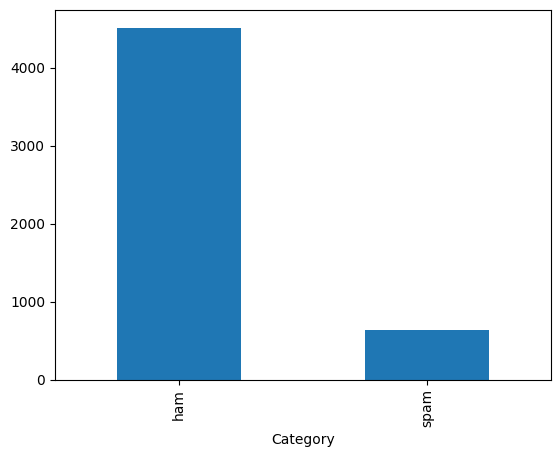

In [19]:
df['Category'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

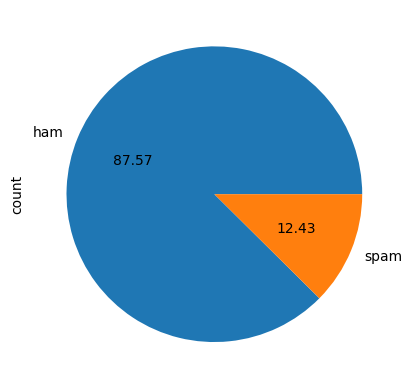

In [20]:
df['Category'].value_counts().plot(kind='pie', autopct='%.2f')

In [21]:
df[['Category']]

,Category
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [22]:
df[['Message']]

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


# **<center> **5. WORD CLOUD** </center>** 

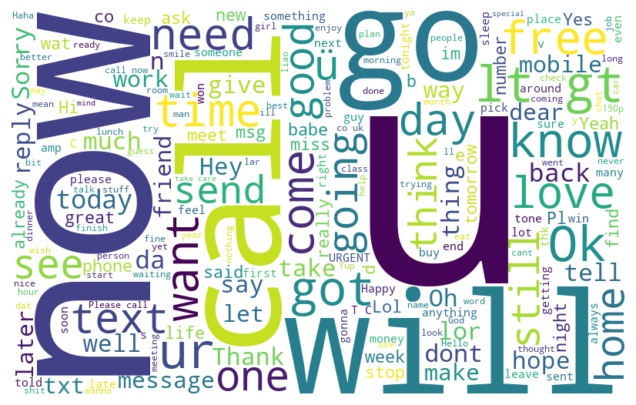

In [23]:
text=' '.join(df['Message'])
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# **<CENTER> **6. FEATURE ENGINNERING :hammer_and_wrench:** </center>**

# 6.1. Label Encoding :unlock::

In [24]:
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

C:\Users\1117m\AppData\Local\Temp\ipykernel_16516\1467010853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category']=le.fit_transform(df['Category'])


In [25]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
X_train = df['Message']  # Email text
y_train = df['Category']  # Spam or not spam label
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# **<center> **7. MODEL EVALUATION :pencil::mag:** </CENTER>**

# :arrow_right: 7.1. Random Forest Classifier:

In [28]:
classifier = RandomForestClassifier()
classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [29]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:", accuracy)

Accuracy: 0.9796511627906976


In [33]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.85      0.92       136

    accuracy                           0.98      1032
   macro avg       0.98      0.93      0.95      1032
weighted avg       0.98      0.98      0.98      1032



# :arrow_right: 7.2. Logistic Regression:

In [34]:
lr = LogisticRegression()
lr.fit(X_train_vectorized, y_train)

LogisticRegression()

In [35]:
y_pred = lr.predict(X_test_vectorized)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9806201550387597


In [43]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.88      0.92       136

    accuracy                           0.98      1032
   macro avg       0.98      0.94      0.96      1032
weighted avg       0.98      0.98      0.98      1032



# :arrow_right: 7.3. AdaBoost Classifier:

In [44]:
boosting = AdaBoostClassifier()
boosting.fit(X_train_vectorized, y_train)

c:\Users\1117m\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [45]:
y_pred = boosting.predict(X_test_vectorized)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9651162790697675


In [48]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.92      0.81      0.86       136

    accuracy                           0.97      1032
   macro avg       0.94      0.90      0.92      1032
weighted avg       0.96      0.97      0.96      1032



# :arrow_right: 7.4. K-Nearest Neighbor:

In [69]:
knn=KNeighborsClassifier()
knn.fit(X_train_vectorized, y_train)

KNeighborsClassifier()

In [70]:
y_pred=knn.predict(X_test_vectorized)

In [71]:
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9137596899224806


In [49]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.92      0.81      0.86       136

    accuracy                           0.97      1032
   macro avg       0.94      0.90      0.92      1032
weighted avg       0.96      0.97      0.96      1032



# **<center> **8. WEB PAGE :sparkler:** </CENTER>**

In [50]:
import pickle

In [51]:
pickle.dump(lr, open('lr.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))

# **<center> **9. CONCLUSION :rocket:** </CENTER>**

In this note book I created a model that will predict whether the email is spam or ham. 
1. I loaded the dataset, explore it and extract the meaningful insights from the data.
2. I made the analysis report of the dataset by using the Profile Report.
3. I visualize the data by plotting the relevant plots.
4. In feature engineering we do label encoding. I also use word cloud and count vectorizer.
5. We have also checked the model on real data. As we evaluate the model on different models (i.e. random forest classifier, AdaBoosting classifier, KNN and logistic regression) but the Logistic Regression is giving 987% accuracy so it is more appropraite model than others.
6. we check the accuracy score and make the confusion matrix and classification report for each model.
7. I made the web page which will detect whether the given email is spam or ham.
